<a href="https://www.kaggle.com/code/dhiamansourkhouja/logement-encadrement-des-loyers?scriptVersionId=116825840" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Analyse des données d'Encadrement des loyers 

Ce projet est a la base un test technique pour le poste stagiare data scientist. 

**Theme** : Urbanisme et Logements.

**Sujet**: Encadrement des loyers.

**Angle d’etude**: La compréhension de la variation des prix de loyer à Paris ainsi que la détermination du poids des variabs dépendantes.

## Plan
1. Acquisition des données
2. Analyse Exploratoire des données
3. Feature Importance avec Regression Lineaire & Decesion Tree

## 1.Recuperation des données de l'encadrement des loyers

In [1]:
import numpy as np

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

# store elements as dictionary keys and their counts as dictionary values
from collections import Counter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Nous avons télécharger notre jeux de données depuis https://opendata.paris.fr/explore/dataset/logement-encadrement-des-loyers/information/?disjunctive.annee&disjunctive.id_zone&disjunctive.nom_quartier&disjunctive.piece&disjunctive.epoque&disjunctive.meuble_txt sous format csv, puis nous avons l'importer à notre éspace de travail sur kaggle pour pouvoir le manipuler.
Aprés, nous avons fait appel à la bibliotheque pandas pour la lecture de fichier csv.

In [2]:
import pandas as pd
df=pd.read_csv("/kaggle/input/prix-loyer/logement-encadrement-des-loyers.csv",lineterminator='\n',sep=';')
df.head()

,Année,Secteurs géographiques,Numéro du quartier,Nom du quartier,Nombre de pièces principales,Epoque de construction,Type de location,Loyers de référence,Loyers de référence majorés,Loyers de référence minorés,Ville,Numéro INSEE du quartier,geo_shape,geo_point_2d\r
0,2020,5,33,Saint-Georges,2,1946-1970,non meublé,23.7,28.44,16.59,PARIS,7510933,"{""coordinates"": [[[2.3392285502760473, 48.8767...","48.879934338782526,2.332850196555468\r"
1,2020,1,28,Gros-Caillou,2,1971-1990,meublé,30.2,36.24,21.14,PARIS,7510728,"{""coordinates"": [[[2.309544250136154, 48.85395...","48.858299903878766,2.3015415556941905\r"
2,2020,2,29,Champs-Elysées,1,Avant 1946,non meublé,32.7,39.24,22.89,PARIS,7510829,"{""coordinates"": [[[2.306463844245763, 48.87014...","48.86707449218534,2.3086516846813985\r"
3,2020,2,34,Chaussée-d'Antin,3,1946-1970,meublé,24.5,29.40,17.15,PARIS,7510934,"{""coordinates"": [[[2.335450084489445, 48.87683...","48.87354738020909,2.3322688688697006\r"
4,2020,5,35,Faubourg-Montmartre,4,1971-1990,non meublé,21.7,26.04,15.19,PARIS,7510935,"{""coordinates"": [[[2.340255299125085, 48.87660...","48.873934691758095,2.343252579473341\r"


### Présentation de notre jeux de données 
Ce jeu de données présente les loyers de référence par quartier, depuis la mise en place de l'encadrement des loyers en 2019.

**L'encadrement des loyers : qu'est-ce que c'est ?**

L'encadrement des loyers est un dispositif qui permet de limiter l'augmentation des loyers des logements du parc privé.
À la location, le loyer proposé (hors charges et hors complément de loyer) est encadré et ne peut pas dépasser un montant plafond (le loyer de référence majoré) au mètre carré qui varie en fonction du quartier, du type de location (vide ou meublé), du nombre de pièces et de l’époque de construction du logement.

**Quels sont les logements concernés?**

L’encadrement s’applique à tous les baux signés à compter du 1er juillet 2019 .
Il s’applique aux locations vides et meublées, tant pour les relocations que pour les premières locations (dont les colocations) et les renouvellements de baux.
Ne sont pas concernés par l’encadrement des loyers:

* Les logements sociaux (HLM, conventionnés APL et ANAH) ;
* Les logements soumis à la loi de 1948 ;
* Les locations saisonnières.

En effet nous avons remarqué que la variable prix de loyer est présente dans 3 colonnes : 
* Loyers de référence: 
c'est la médian.
* Loyers de référence minorés:
qui est l'équivalent du loyer de référence médian -30%.
* Loyers de référence majorés: 
équivalent au loyer de référence +20%.

### Dimension de notre jeux de données 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Année                         10240 non-null  int64  
 1   Secteurs géographiques        10240 non-null  int64  
 2   Numéro du quartier            10240 non-null  int64  
 3   Nom du quartier               10240 non-null  object 
 4   Nombre de pièces principales  10240 non-null  int64  
 5   Epoque de construction        10240 non-null  object 
 6   Type de location              10240 non-null  object 
 7   Loyers de référence           10240 non-null  float64
 8   Loyers de référence majorés   10240 non-null  float64
 9   Loyers de référence minorés   10240 non-null  float64
 10  Ville                         10240 non-null  object 
 11  Numéro INSEE du quartier      10240 non-null  int64  
 12  geo_shape                     10240 non-null  object 
      

Notre jeux de données est constitué par 10240 lignes et 14 colonnes ; avec 8 variables quantitatives et 6 qualitative.

## Analyse Univariée des Variables

L'analyse univariée a pour but de décrire et mesurer la répartition des valeurs que peut prendre une variable.

**La variable Secteurs géographiques**

In [4]:
res = df.groupby('Secteurs géographiques')['Secteurs géographiques'].count()
print(res)


Secteurs géographiques
1      640
2     1792
3      512
4     1408
5     1024
6      384
7      384
8      128
9      384
10     768
11    1152
12     256
13     896
14     512
Name: Secteurs géographiques, dtype: int64


In [5]:
Ratio_d_imbalance_des_données=(res/10240)*100
Ratio_d_imbalance_des_données

Secteurs géographiques
1      6.25
2     17.50
3      5.00
4     13.75
5     10.00
6      3.75
7      3.75
8      1.25
9      3.75
10     7.50
11    11.25
12     2.50
13     8.75
14     5.00
Name: Secteurs géographiques, dtype: float64

Nous remarquons qu'il existe une imbalance dans la répartitions des observations au niveau de la variable "Secteurs géographiques" .Par exemple, le nombre d'appartement qui existe dans le 8ème Secteur géographique représente 1.25% de l'ensemble des observations. 

**Numéro du quartier**

En effet, la variable "Numéro du quartier" et "Nom du quartier" nous indique la même information.
Nous allons donc utiliser que la variable "Numéro du quartier" dans notre analyse puisqu'elle est plus facile à manipuler.

In [6]:
res = df.groupby('Numéro du quartier')['Numéro du quartier'].count()
print(res)

Numéro du quartier
1     128
2     128
3     128
4     128
5     128
     ... 
76    128
77    128
78    128
79    128
80    128
Name: Numéro du quartier, Length: 80, dtype: int64


**Numéro INSEE du quartier**

Le code Insee du quartier est un code numérique, élaboré par l'Institut national de la statistique et des études économiques, service public français chargé de la production et de l'analyse des différentes données statistiques concernant les collectivités, la géographie, les populations et les entreprises.

In [7]:
res = df.groupby('Numéro INSEE du quartier')['Numéro INSEE du quartier'].count()
print(res)

Numéro INSEE du quartier
7510101    128
7510102    128
7510103    128
7510104    128
7510205    128
          ... 
7511976    128
7512077    128
7512078    128
7512079    128
7512080    128
Name: Numéro INSEE du quartier, Length: 80, dtype: int64


La variable "Numéro INSEE" du quartier contient 80 valeurs et nous donne presque la même information du numéro de quartier. Il serait plus intéressant alors d'éxtraire le code postale de chaque arrondissement de paris à partir de numéro INSEE puisque la visualisation de 80 classes est un peu difficile.

le code postale de 75101 correspond au code postale de 1er arrondissement...

In [8]:
df["code_pos"] = df["Numéro INSEE du quartier"]//100 


**Epoque de construction**

In [9]:
res = df.groupby('Epoque de construction')['Epoque de construction'].count()
print(res)

Epoque de construction
1946-1970     2560
1971-1990     2560
Apres 1990    2560
Avant 1946    2560
Name: Epoque de construction, dtype: int64


La variable Epoque de construction contient 4 valeurs possible.

**Type de location**

In [10]:
res = df.groupby('Type de location')['Type de location'].count()
print(res)

Type de location
meublé        5120
non meublé    5120
Name: Type de location, dtype: int64


**geo_shape**

La variable geo_shape indique l'adresse de l'observation. 
La première valeure du geo_shape correspond au Latitude tandis que la 2ème correspond à la Longitude.


Nous allons commencer par vérifier s'il existe des redondance au niveau de la variable geo_shape.

In [11]:
df.geo_shape.nunique()

80

Il existe donc 80 adresses uniques et 10160 observations qui ont les même adresses ( une adresse d'un batiment peut contenir plusieurs logements) .

**Nombre de pièces principales**

In [12]:
res = df.groupby('Nombre de pièces principales')['Nombre de pièces principales'].count()
print(res)

Nombre de pièces principales
1    2560
2    2560
3    2560
4    2560
Name: Nombre de pièces principales, dtype: int64


Nous remarquons qu'il n'existe pas d'imbalance intra-classe pour la variable Nombre de pièces principales, c'est à dire : le nombre de pièces est identiquement distribué.

**Loyers de référence**

<AxesSubplot:ylabel='Density'>

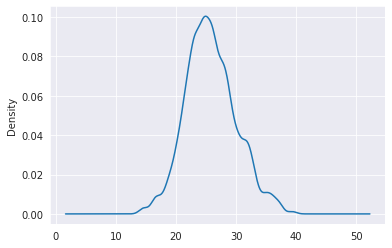

In [13]:
df["Loyers de référence"].plot.kde()

Nous remarquons que la distribution de la variable prix de réference ressemble à une loi normale. Nous allons tester cette hypthèse à travers **le test de shapiro**

In [14]:
from scipy.stats import shapiro
stat, p = shapiro(df["Loyers de référence"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
 print("Loyers de référence parait Gaussianne (accepté H0)")
else:
 print('la variable Loyers de référence ne suit pas une loi Gaussiane (rejeté H0)')

Statistics=0.993, p=0.000
la variable Loyers de référence ne suit pas une loi Gaussiane (rejeté H0)


/opt/conda/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


La variable Loyers de référence ne suit pas une loi normale d'aprés le test statistique.

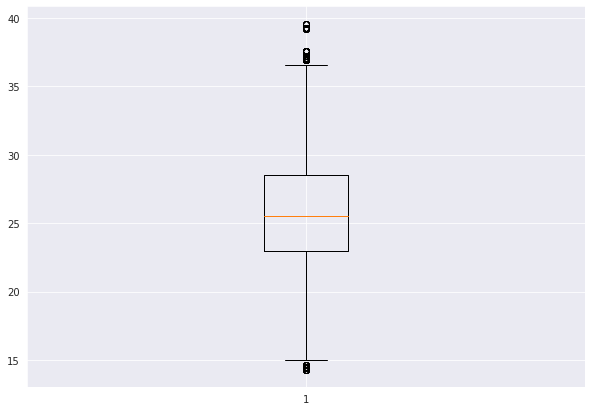

In [15]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df["Loyers de référence"])
 
# show plot
plt.show()

* loyer de référence Min =14.30 et le Max= 39.60 avec un écart-type de 4.20
* 25% des locataires payent entre 15 et 23 euro pour mètre carré de surface habitable(1er quantile)
* la mediane de loyer de référence est 25.5
* 50% des locataires payent entre 23 et 28.5 euro(inter quartile)
* 25% des locataires payent entre 28.6 et 36.6 euro pour mètre carré de surface habitable(3eme quantile)
* On remarque aussi la presence de quelque valeurs abérrantes de deux cotés de la boite à moustache qui peuvent etre expliquer par d'autres facteurs (tel que l'approximité des écoles/transport public..)

## Analyse bivariée des Variables

**Relation entre Secteurs géographiques et Loyers de référence**

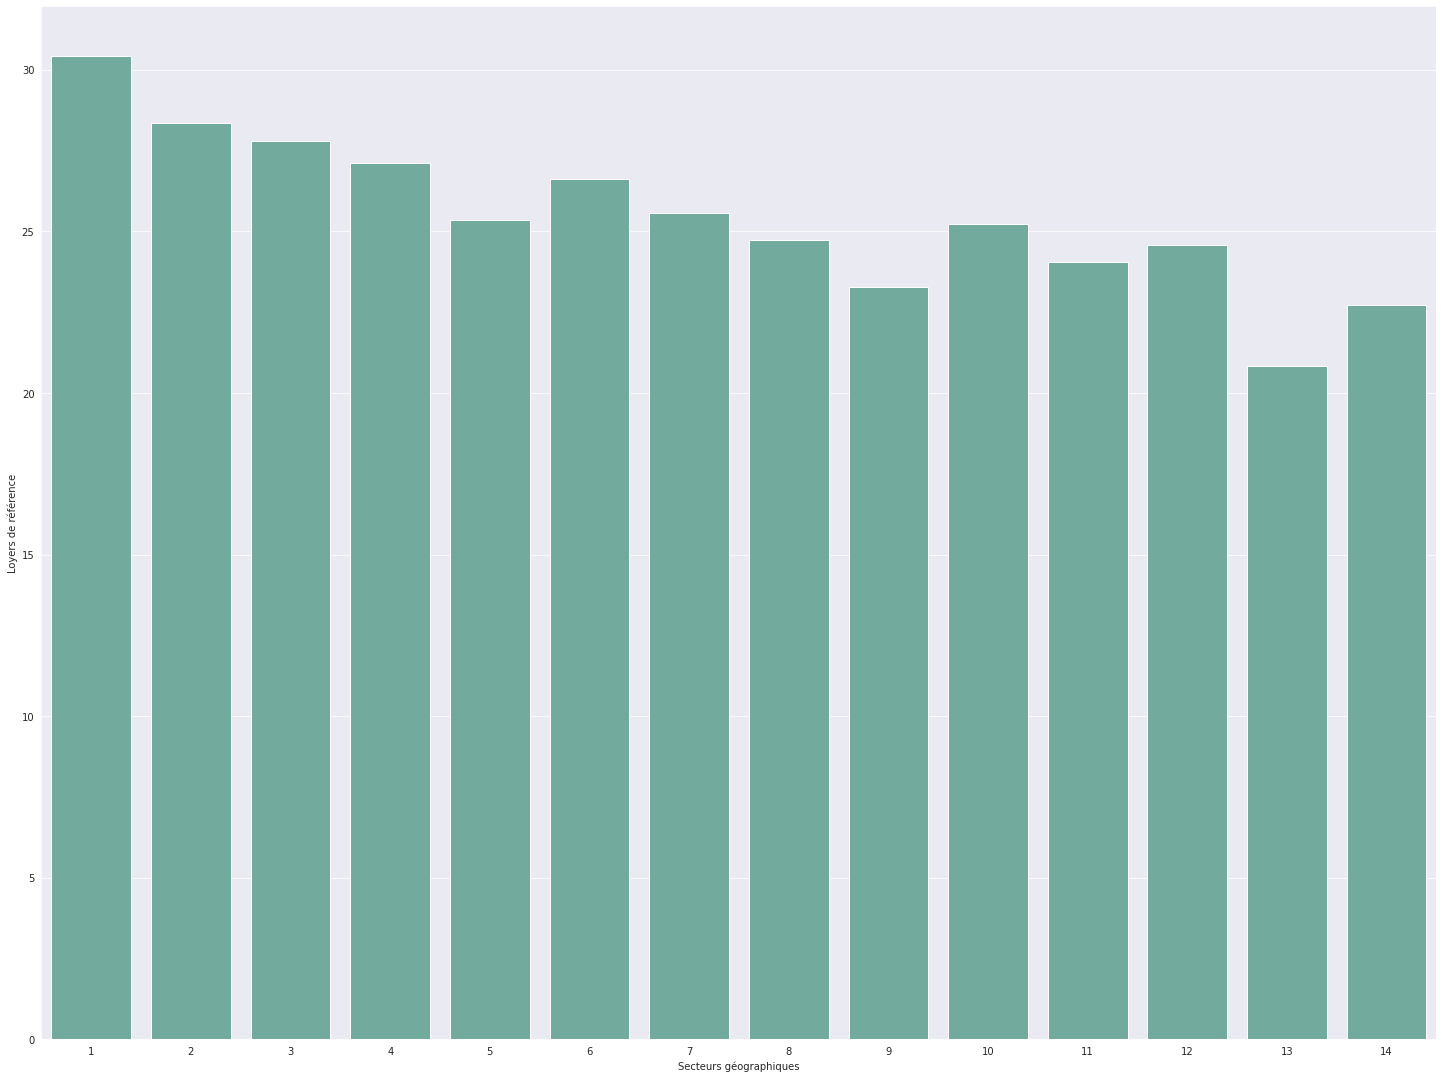

In [16]:
plt.figure(figsize=(25, 19))
sns.barplot(
    x='Secteurs géographiques', 
    y='Loyers de référence', 
    data=df,
 
    ci=None, 
    color='#69b3a2');

En moyenne, les personnes qui habite dans la 1ere zone géographiques payent un loyer plus cher que les personne qui habite dans autres zones .Ceci peut etre expliquer par le fait que le**"secteur géographique" num 1** est dans le coeur de paris ce qui le rend accecible à toute commodité.
La 13eme zone possède le loyer le moins cher.

**Relation entre Nombre de pièces principales et Type de location**

In [17]:

df2 = df.groupby(['Nombre de pièces principales','Type de location'])['Nombre de pièces principales'].count()
print(df2)

Nombre de pièces principales  Type de location
1                             meublé              1280
                              non meublé          1280
2                             meublé              1280
                              non meublé          1280
3                             meublé              1280
                              non meublé          1280
4                             meublé              1280
                              non meublé          1280
Name: Nombre de pièces principales, dtype: int64


On remarque qu'il n'existe pas de relation entre le nb de pièces et le type de location; autrement dit les variables sont identiquement distribués.

**Relation entre Nombre de pièces principales & Loyers de référence**

<AxesSubplot:xlabel='Nombre de pièces principales', ylabel='Loyers de référence'>

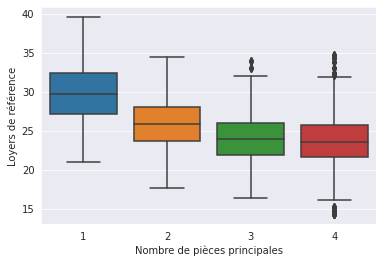

In [18]:
sns.boxplot(x="Nombre de pièces principales", y="Loyers de référence", data=df)

Nous remarquons que certains Logements qui contient une seule pièce sont plus chers que d'autres qui contient plus de pièce. nous remarquons même que certains logements avec 2 pièces sont moins chers que ceux qui contient 1 seule pièce. La présence des outliers au-delà du max pour les prix de location des logements qui contiennent 4 pièces peut être expliqué par l'emplacement de ces logements dans un endroit stratégique(Secteurs géographiques=1 par exp )

In [19]:
ss = pd.qcut(df['Loyers de référence'], q=3, precision=0)
ss

0        (13.0, 24.0]
1        (27.0, 40.0]
2        (27.0, 40.0]
3        (24.0, 27.0]
4        (13.0, 24.0]
             ...     
10235    (24.0, 27.0]
10236    (27.0, 40.0]
10237    (27.0, 40.0]
10238    (24.0, 27.0]
10239    (27.0, 40.0]
Name: Loyers de référence, Length: 10240, dtype: category
Categories (3, interval[float64, right]): [(13.0, 24.0] < (24.0, 27.0] < (27.0, 40.0]]

Dans la cellule ci-dessus nous avonc créé une nouvelle variable ss en divisant la variable Loyer de référence sur 3 intervalles afin de mieux visualiser nos données

<AxesSubplot:xlabel='Nombre de pièces principales', ylabel='count'>

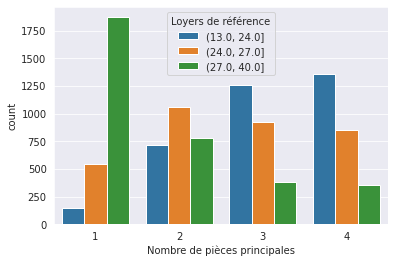

In [20]:
sns.countplot(x='Nombre de pièces principales', hue = ss,data = df)

* La majorité des locataires payent entre 27 et 40 euro pour un T+1.
* Pour les T+2 la majorité payent entre 24 et 27.
* Pour les T+3 la majorité payent entre 13 et 24.
* pour les T+4 la majorité payent entre 13 et 24.

Ceci est un peu bizarre car on suppose qu'il existe une correlation positive entre le nb de pièces et le loyer de référence. 

Nous allons donc calculer la corrélation entre les deux variables.

In [21]:
from scipy.stats import pearsonr
list1 = df['Loyers de référence']
list2 = df['Nombre de pièces principales']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.552


La corrélation entre les deux variables est négativement modérée.
En effet, il se peut que les logement avec un nombre de pièces mineurs se situent dans un endroit stratégique, de plus on sait que la surface des logements dans les grandes villes est génralement inferieures à celles qui se trouve dans la campagnes par exemple.

### Evolution de prix de loyer au cours du temps pour différent type de logement (nombre de pièce principale fixe)

<AxesSubplot:xlabel='Année', ylabel='Loyers de référence'>

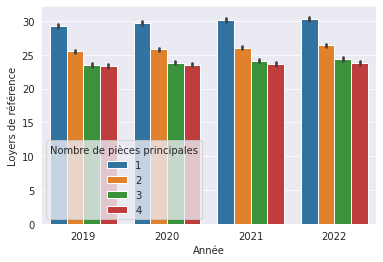

In [22]:
sns.barplot(data=df, y='Loyers de référence', x='Année', hue='Nombre de pièces principales')

On remarque que les prix de différent type de logements augmentent chaque année; ce qui est normal.

# l'influence de Type de Location sur le prix de location

<AxesSubplot:xlabel='Type de location', ylabel='Loyers de référence'>

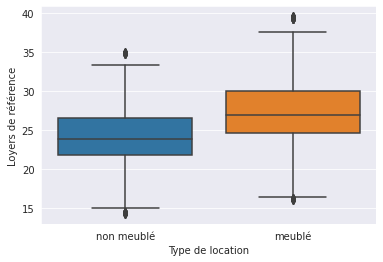

In [23]:
sns.boxplot(x="Type de location", y="Loyers de référence", data=df)

On remarque que les logements non meublé sont moins cher que les autres.
On testera la correlation entre les deux variables à travers un test Anova; puisque la variable "type de location" est qualitative (on peut pas calculer la correlation à travers la méthode de pearson )
* l'hypothese h0 est : il n'existe pas de correlation (cette hypothèse sera rejeté si pvalue≤0.05)
* h1: les deux variables sont correlée (on admet cette hypothèse si pvalue est presque nul)

In [24]:

meub=["Type de location","Loyers de référence"]
dff=df[meub]
dff.head()

,Type de location,Loyers de référence
0,non meublé,23.7
1,meublé,30.2
2,non meublé,32.7
3,meublé,24.5
4,non meublé,21.7


In [25]:
from scipy.stats import f_oneway
CategoryGroupLists=dff.groupby('Type de location')['Loyers de référence'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  0.0


Les deux variables Type de location & prix de loyer sont corrélée(comme Pvalue est presque 0)

<AxesSubplot:xlabel='Année', ylabel='Loyers de référence'>

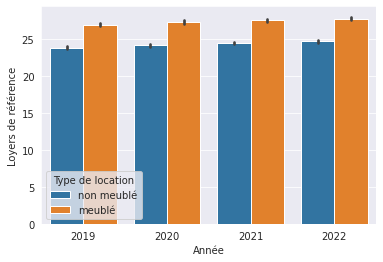

In [26]:
sns.barplot(data=df, y='Loyers de référence', x='Année', hue='Type de location')

<AxesSubplot:xlabel='Année', ylabel='Loyers de référence'>

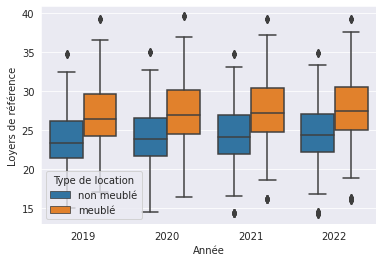

In [27]:
sns.boxplot(data=df, x="Année", y='Loyers de référence', hue='Type de location')

On remarque que l'augmentation des prix de loyers des logements meublés est plus grande que les non meublé; ceci peut être expliqué par l'augmentation des prix des meubles.

## Relation entre Secteurs géographiques et prix de loyer

<AxesSubplot:xlabel='Secteurs géographiques', ylabel='Loyers de référence'>

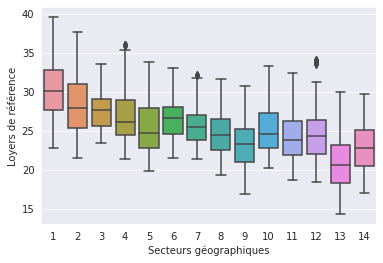

In [28]:
sns.boxplot(x="Secteurs géographiques", y="Loyers de référence", data=df)

* Les prix des loyers les plus chers se trouvent dans les Secteurs géographiques numéro 1 et 2
* Les prix des loyers les moins chers se trouvent dans le Secteur géographique numéro 13

In [29]:
CategoryGroupLists=df.groupby('Secteurs géographiques')['Loyers de référence'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  0.0


Les deux variables Secteurs géographiques & prix de loyer sont corrélée. c'est vrai que la variable "Secteurs géographiques" est de type Int mais réellement c'est une variable catégorielle.

## Relation entre le code postale et le loyers de référence

<AxesSubplot:xlabel='code_pos', ylabel='Loyers de référence'>

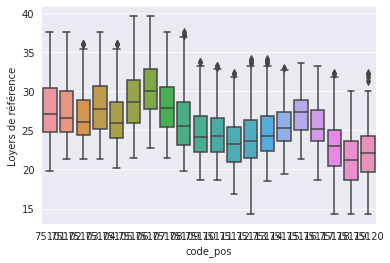

In [30]:
sns.boxplot(x="code_pos", y="Loyers de référence", data=df)

* Le loyer le moins cher se trouve au 19ème arrondissement
* Le loyer le plus cher se trouve au 7ème arrondissement

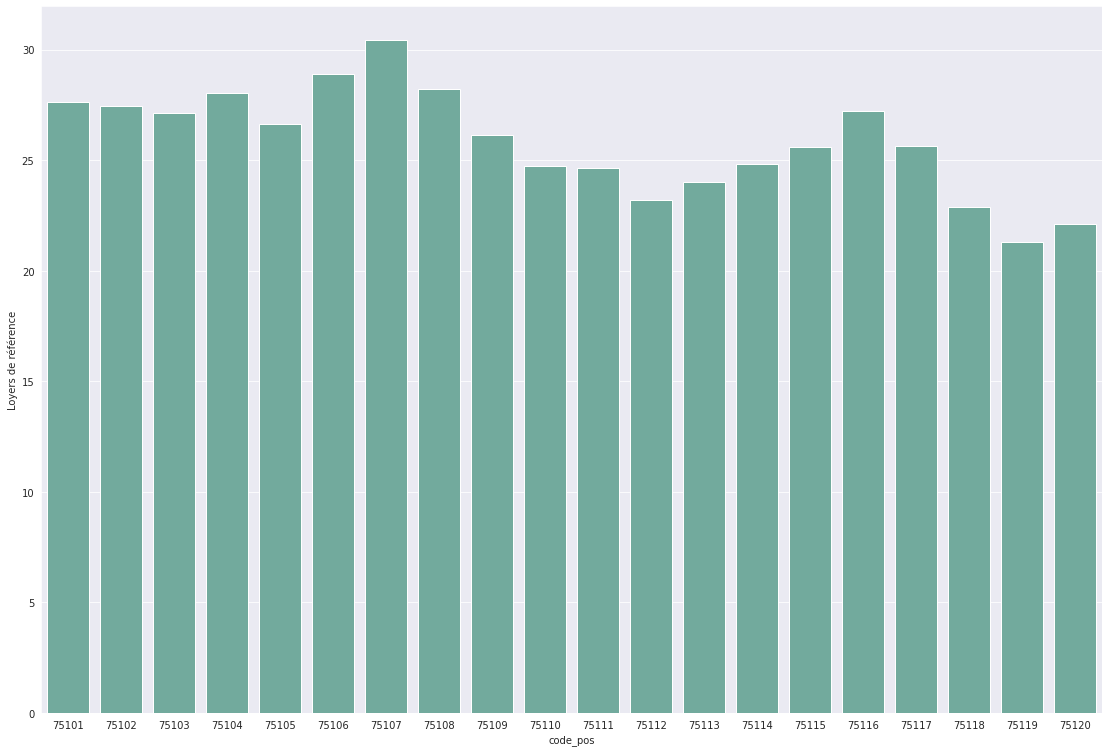

In [31]:
plt.figure(figsize=(19, 13))
sns.barplot(
    x='code_pos', 
    y='Loyers de référence', 
    data=df, 
     
    ci=None, 
    color='#69b3a2');

**Relation entre Année de construction du logement et loyers de référence**

<AxesSubplot:xlabel='Epoque de construction', ylabel='Loyers de référence'>

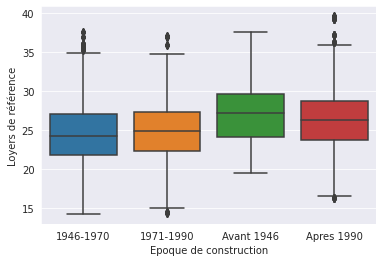

In [32]:
sns.boxplot(x="Epoque de construction", y="Loyers de référence", data=df)

In [33]:
rs = df.groupby('Epoque de construction')['Epoque de construction'].count()
print(rs)

Epoque de construction
1946-1970     2560
1971-1990     2560
Apres 1990    2560
Avant 1946    2560
Name: Epoque de construction, dtype: int64


<AxesSubplot:xlabel='Epoque de construction', ylabel='count'>

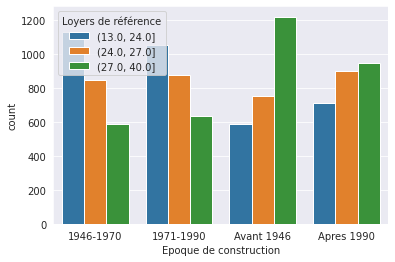

In [34]:
sns.countplot(x='Epoque de construction', hue = ss,data = df)

In [35]:
a = df.groupby(['Nombre de pièces principales','Epoque de construction'])['Epoque de construction'].count()
print(a)

Nombre de pièces principales  Epoque de construction
1                             1946-1970                 640
                              1971-1990                 640
                              Apres 1990                640
                              Avant 1946                640
2                             1946-1970                 640
                              1971-1990                 640
                              Apres 1990                640
                              Avant 1946                640
3                             1946-1970                 640
                              1971-1990                 640
                              Apres 1990                640
                              Avant 1946                640
4                             1946-1970                 640
                              1971-1990                 640
                              Apres 1990                640
                              Avant 1946       

les logements qui ont été construit avant 1946 sont plus cher que ceux qui ont été construit entre 1946 et 1990; ceci peut-être expliqué par le fait qu'ils sont trés anciens et il y'avait des travaux de rénnovation qui ne sont pas mentionné dans notre jeux de données.

## Feature Importance avec Regression Lineaire &  Decesion Tree 

Pour mieux comprendre l'impact des variables indépendantes sur le prix de loyer (variable dépendante) nous allons construire une arbre de regression et un modèle de regression Lineaire afin de savoir le poids de chaque variable. 

### Decesion Tree

Nous allons commencer par la sélection des variables catégorielles afin de faire les transformations nécessaires pour qu'on puisse les utiliser.

In [36]:
variable_catégo=["Secteurs géographiques","Numéro du quartier","Epoque de construction","Type de location","code_pos"]
cc=df[variable_catégo]
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()


In [37]:
data_encoded = encoder.fit_transform(cc)


In [38]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [39]:
df[["Secteurs géographiques","Numéro du quartier","Epoque de construction","Type de location","code_pos"]] = df[["Secteurs géographiques","Numéro du quartier","Epoque de construction","Type de location","code_pos"]].apply(LabelEncoder().fit_transform)

Nous avons appliquer la technique labelencoder pour transformer les variables catégorielles.

In [40]:
var_explica =["Secteurs géographiques","Numéro du quartier","Epoque de construction","Type de location","code_pos","Nombre de pièces principales"]
df_explica=df[var_explica]
df_explica.head()

,Secteurs géographiques,Numéro du quartier,Epoque de construction,Type de location,code_pos,Nombre de pièces principales
0,4,32,0,1,8,2
1,0,27,1,0,6,2
2,1,28,3,1,7,1
3,1,33,0,0,8,3
4,4,34,1,1,8,4


La prédiction de la variable "Loyers de référence" est notre objectif, et puisqu'elle est une variable quantitative, donc il s'agit bien d'une régression .

In [41]:
target=["Loyers de référence"]
data_target=df[target]
data_target.head()

,Loyers de référence
0,23.7
1,30.2
2,32.7
3,24.5
4,21.7


Nous allons utiliser la technique GridSearchCV pour trouver les meilleurs hyperparametres de notre arbre de regréssion.

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
param_grid = {"max_depth": np.arange(2, 10, 1)}
tree_reg = GridSearchCV(DecisionTreeRegressor(), param_grid=param_grid)

In [43]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9],
           "min_samples_leaf":[3,4,5,6,7],
           "max_leaf_nodes":[10,20] }

In [44]:
reg_decision_model=DecisionTreeRegressor()

In [45]:
from sklearn.model_selection import GridSearchCV
tuning_model=GridSearchCV(reg_decision_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [46]:
tuning_model.fit(df_explica,data_target)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, splitter=best;, score=-12.712 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, splitter=best;, score=-11.978 total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, splitter=best;, score=-12.245 total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=-12.712 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=-14.223 total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=-14.812 total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=4, splitter=best;, score=-12.712 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=4, splitter=best;, score=-11.978 total time=   0.0s
[CV 3/3] END max_de

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9],
                         'max_leaf_nodes': [10, 20],
                         'min_samples_leaf': [3, 4, 5, 6, 7],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

En utilisant le "neg_mean_squared_error" comme indice de performance, les meilleurs hyperparamètres pour notre modèle sont:

In [47]:
tuning_model.best_params_

{'max_depth': 9,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 3,
 'splitter': 'best'}

In [48]:
tuned_hyper_model=DecisionTreeRegressor(max_depth=7,max_leaf_nodes= 20,
 min_samples_leaf=5,splitter='best')

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_explica, data_target, test_size=0.2, random_state=0)

In [50]:
tuned_hyper_model.fit(X_train,y_train)
tuned_pred=tuned_hyper_model.predict(X_test)

Nous allons utiliser les indices de performances suivantes pour évaluer notre modèle:
* MAE= moyenne arithmétique des valeurs absolues des écarts.
* MSE=  c’est la moyenne arithmétique des carrés des écarts entre prévisions du modèle et observations.
* RMSE= L’erreur quadratique moyenne

In [51]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_pred)))

MAE: 1.4745654958111793
MSE: 3.2534372460290264
RMSE: 1.8037287063272642


Nous remarquons que nous avons un bon modèle de predictif

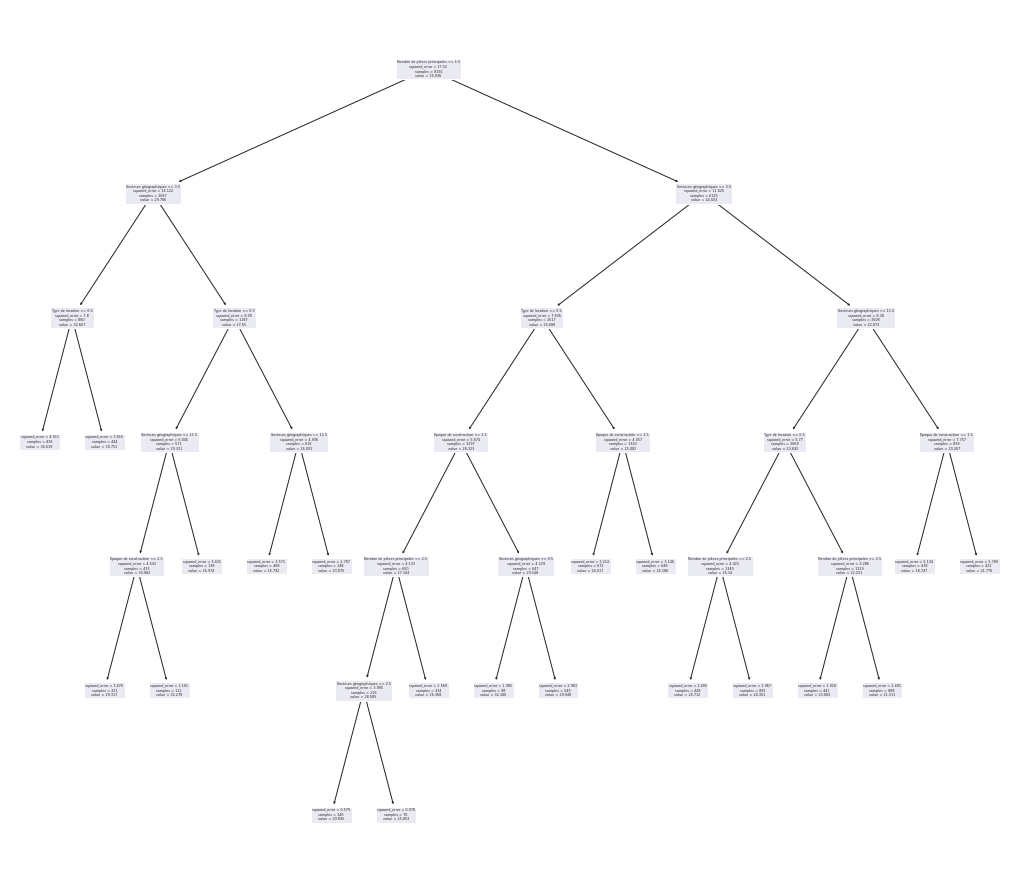

In [52]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(18, 16))
_ = plot_tree(tuned_hyper_model, feature_names=var_explica, ax=ax)

D'aprés notre modèle; la variable nombre de pièce est la variable la plus importante, puis le secteur geographique, type de location, époque de construction.

### Regression Lineaire

Dans cette partie nous allons essayer de déterminer le poids de chaque variable en se basant sur un modèle de régression linaire.


In [53]:

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [54]:
print('Variance score: {}'.format(model.score(X_test, y_test)))

Variance score: 0.8075734664363922


Nous avons obtenue un modèle de régression avec un bon indice de performance, donc on peut lui faire confiance dans la détermination des poids des variables.

In [55]:
importances = pd.DataFrame(data={'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

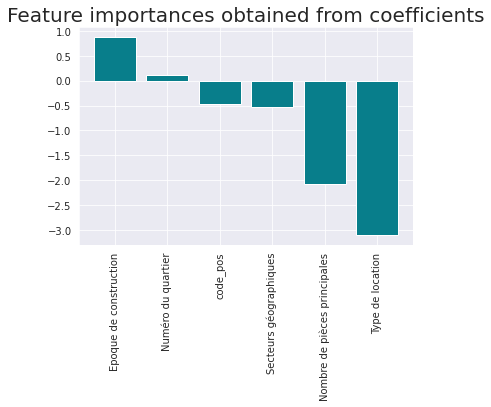

In [56]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

Selon le modèle de regression linéaire ; la variable type de location est la plus importante, puis le nombre de pièce... .